In [44]:
import pandas as pd

In [45]:
touch = pd.read_csv("DATA/touches_per_30minutes.csv")

In [46]:
touch.head()

,Unnamed: 0,experimentid,userid,day,timestamp,touch_count
0,0,wenetItaly,144,20201117,2020-11-17 23:30:00,93
1,93,wenetItaly,144,20201117,2020-11-17 23:00:00,1
2,94,wenetItaly,144,20201117,2020-11-17 22:00:00,10
3,104,wenetItaly,144,20201117,2020-11-17 21:30:00,37
4,141,wenetItaly,144,20201117,2020-11-17 21:00:00,40


In [47]:
touch = touch.drop("Unnamed: 0", axis=1)
touch.head()

,experimentid,userid,day,timestamp,touch_count
0,wenetItaly,144,20201117,2020-11-17 23:30:00,93
1,wenetItaly,144,20201117,2020-11-17 23:00:00,1
2,wenetItaly,144,20201117,2020-11-17 22:00:00,10
3,wenetItaly,144,20201117,2020-11-17 21:30:00,37
4,wenetItaly,144,20201117,2020-11-17 21:00:00,40


**<h2>Selecting users with more than 80% response rate</h2>**

In [48]:
users = [0, 1, 2, 3, 4, 5, 6, 8, 9, 15, 18, 19, 20, 21, 26, 27, 28, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 50, 52, 54, 57, 58, 59, 60, 61, 65, 66, 70, 73, 74,
         75, 76, 77, 79, 80, 84, 87, 89, 91, 97, 98, 99, 100, 103, 105, 107, 109, 111, 112, 113, 114, 118, 119, 121, 126, 128, 130, 131, 132, 134, 136, 141, 144, 146,
         148, 155, 157, 158, 160, 161, 162, 163, 165, 166, 169, 174, 176, 177, 187, 190, 191, 192, 194, 197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 212, 213,
         215, 216, 217, 218, 222, 223, 225, 226, 229, 230, 231, 234, 238, 239, 240, 244, 250, 251, 252, 253, 254, 255, 256, 258, 259, 260, 261, 262, 264, 266]
touch = touch[touch['userid'].isin(users)]

In [49]:
tdiary = pd.read_csv("DATA/tdiary_filtrato.csv")
tdiary = tdiary[['id', 'date_not','what', 'withw', 'where']]
tdiary

,id,date_not,what,withw,where
0,0.0,2020-11-13 00:00:00,No information,No information,No information
1,0.0,2020-11-13 00:30:00,No information,No information,No information
2,0.0,2020-11-13 01:00:00,No information,No information,No information
3,0.0,2020-11-13 01:30:00,No information,No information,No information
4,0.0,2020-11-13 02:00:00,No information,No information,No information
...,...,...,...,...,...
153727,266.0,2020-12-11 19:00:00,Study/work group,Alone,Home apartment /room
153728,266.0,2020-12-11 20:00:00,Other Shopping,Alone,Home apartment /room
153729,266.0,2020-12-11 21:00:00,Other,Alone,Other university place
153730,266.0,2020-12-11 22:00:00,Sleeping,Alone,Home apartment /room


In [50]:
len(tdiary['id'].unique())

138

In [51]:
tdiary['date_not'] = pd.to_datetime(tdiary['date_not'])
touch['timestamp'] = pd.to_datetime(touch['timestamp'])

merged_df = pd.merge(tdiary, touch, left_on=['id', 'date_not'], right_on=['userid', 'timestamp'], how='inner')
merged_df.head(20)

,id,date_not,what,withw,where,experimentid,userid,day,timestamp,touch_count
0,1.0,2020-11-13 00:00:00,No information,No information,No information,wenetItaly,1,20201113,2020-11-13 00:00:00,58
1,1.0,2020-11-13 00:30:00,No information,No information,No information,wenetItaly,1,20201113,2020-11-13 00:30:00,30
2,1.0,2020-11-13 08:00:00,No information,No information,No information,wenetItaly,1,20201113,2020-11-13 08:00:00,9
3,1.0,2020-11-13 09:00:00,Eating,Relative(s),Relatives Home,wenetItaly,1,20201113,2020-11-13 09:00:00,286
4,1.0,2020-11-13 09:30:00,Study/work group,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 09:30:00,298
5,1.0,2020-11-13 10:00:00,Study/work group,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 10:00:00,897
6,1.0,2020-11-13 10:30:00,Study/work group,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 10:30:00,226
7,1.0,2020-11-13 11:00:00,Personal care,Alone,Relatives Home,wenetItaly,1,20201113,2020-11-13 11:00:00,14
8,1.0,2020-11-13 11:30:00,Lecture/seminar/conference/university meeting,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 11:30:00,163
9,1.0,2020-11-13 12:00:00,Lecture/seminar/conference/university meeting,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 12:00:00,48


In [52]:
merged_df = merged_df[merged_df['what']=="Study/work group"]
merged_df = merged_df[['userid','what','withw','where','timestamp','touch_count']]

In [32]:
#merged_df.to_csv("DATA/touches_study.csv")

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = merged_df.copy()

# Seleziona solo le colonne necessarie
df = df[['userid', 'timestamp', 'touch_count']]

# Converti la colonna timestamp in formato datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calcola il numero medio di tocchi per mezzora per ciascun utente
average_touches = df.groupby(['userid', df['timestamp']])['touch_count'].mean().reset_index()
average_touches.rename(columns={'touch_count': 'average_touches'}, inplace=True)

# Crea un DataFrame con userid e media dei tocchi
user_avg_df = average_touches.groupby('userid')['average_touches'].mean().reset_index()

# Normalizza i dati per prepararli all'algoritmo di clustering
scaler = StandardScaler()
user_avg_df[['average_touches']] = scaler.fit_transform(user_avg_df[['average_touches']])


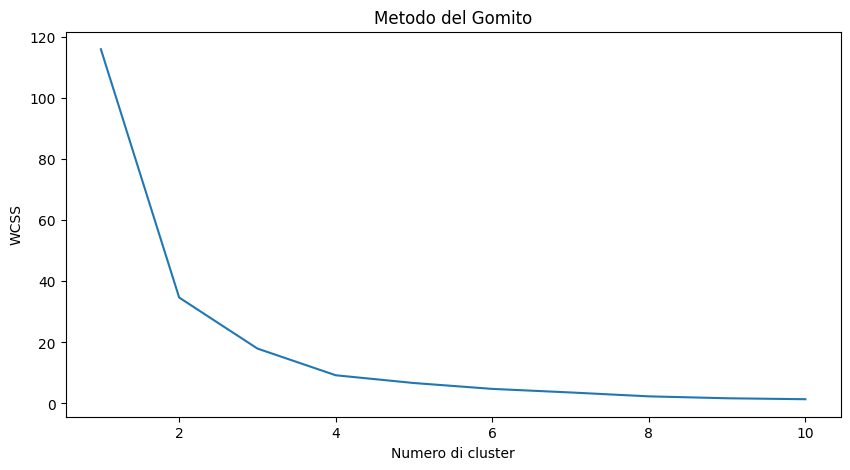

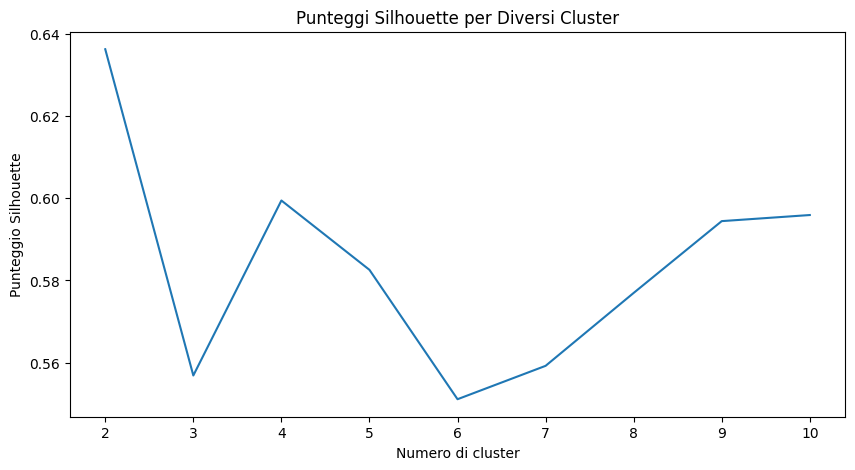

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(user_avg_df[['average_touches']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di cluster')
plt.ylabel('WCSS')
plt.show()

# Metodo Silhouette
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(user_avg_df[['average_touches']])
    score = silhouette_score(user_avg_df[['average_touches']], cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Punteggi Silhouette per Diversi Cluster')
plt.xlabel('Numero di cluster')
plt.ylabel('Punteggio Silhouette')
plt.show()


**<h1>WHILE STUDYING</h1>**

/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


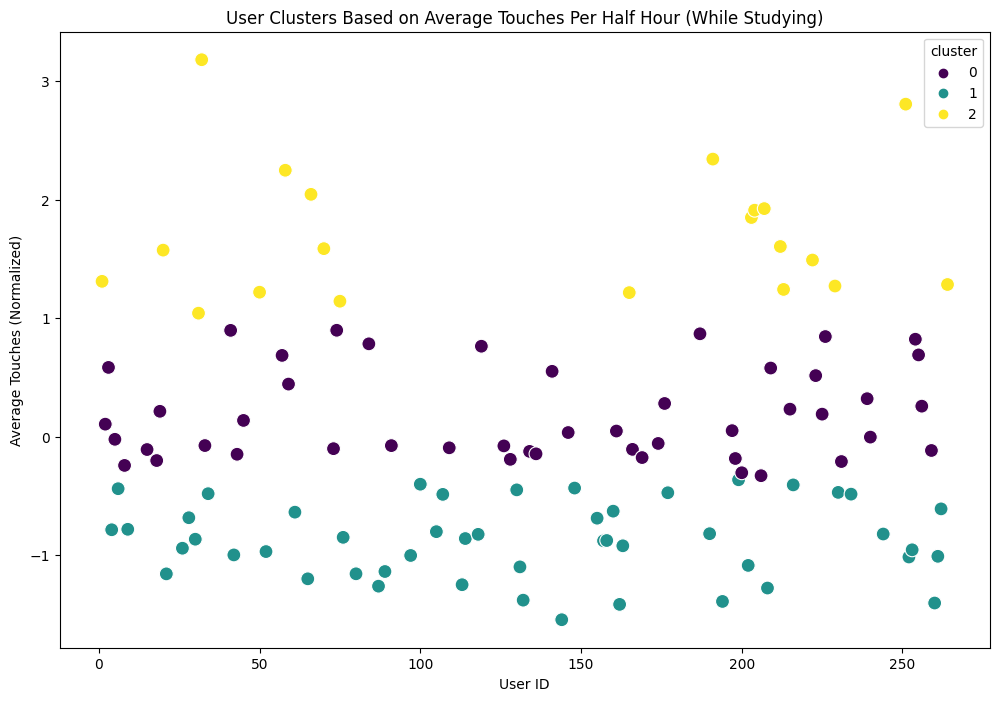

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
user_avg_df['cluster'] = kmeans.fit_predict(user_avg_df[['average_touches']])

# Visualizza i cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='userid', y='average_touches', hue='cluster', data=user_avg_df, palette='viridis', s=100)
plt.title('User Clusters Based on Average Touches Per Half Hour (While Studying)')
plt.xlabel('User ID')
plt.ylabel('Average Touches (Normalized)')
plt.show()

In [36]:
cluster_stats = user_avg_df.groupby('cluster')['average_touches'].describe()
print(cluster_stats)


         count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0         47.0  0.184171  0.382734 -0.330559 -0.113659  0.046517  0.532610   
1         49.0 -0.876447  0.318254 -1.546585 -1.100535 -0.866785 -0.629967   
2         20.0  1.714493  0.579305  1.041723  1.263687  1.580230  1.954603   

              max  
cluster            
0        0.897258  
1       -0.365122  
2        3.181545  


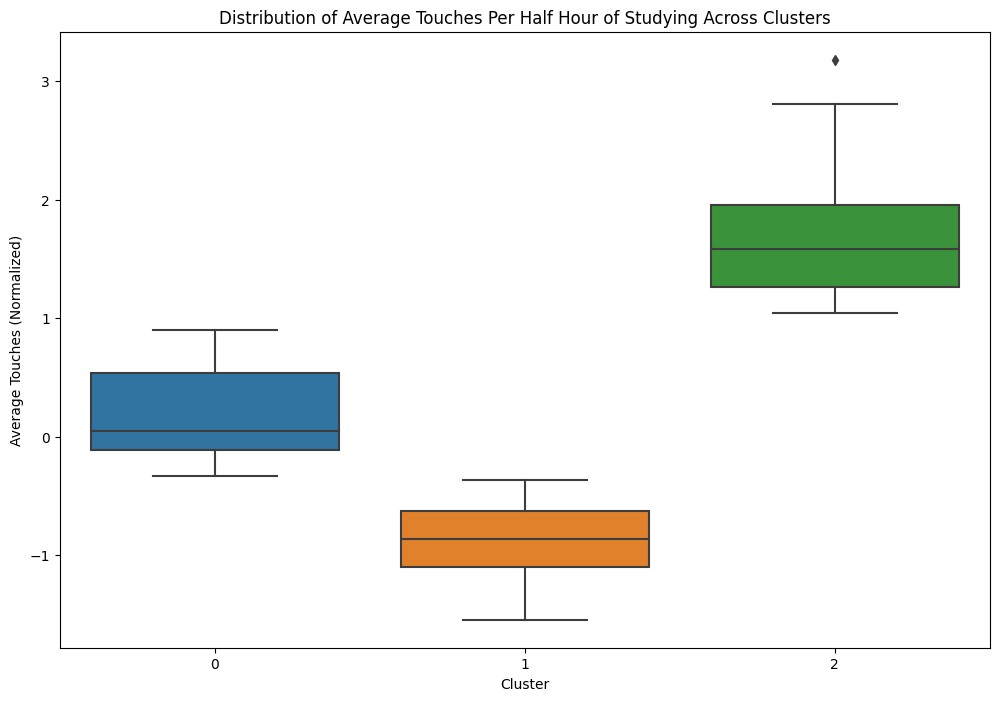

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='average_touches', data=user_avg_df)
plt.title('Distribution of Average Touches Per Half Hour of Studying Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Touches (Normalized)')
plt.show()


In [38]:
user_avg_df

,userid,average_touches,cluster
0,1,1.310429,2
1,2,0.104614,0
2,3,0.583658,0
3,4,-0.787027,1
4,5,-0.023291,0
...,...,...,...
111,259,-0.117648,0
112,260,-1.405573,1
113,261,-1.011167,1
114,262,-0.610839,1


In [39]:
# Lista degli userid per ciascun cluster
cluster_userids = user_avg_df.groupby('cluster')['userid'].apply(list)
clsDict = dict()
# Visualizza la lista degli userid per ogni cluster
for cluster, userids in cluster_userids.items():
    print(f'Cluster {cluster}: {userids}')
    clsDict[cluster] = userids


Cluster 0: [2, 3, 5, 8, 15, 18, 19, 33, 41, 43, 45, 57, 59, 73, 74, 84, 91, 109, 119, 126, 128, 134, 136, 141, 146, 161, 166, 169, 174, 176, 187, 197, 198, 200, 206, 209, 215, 223, 225, 226, 231, 239, 240, 254, 255, 256, 259]
Cluster 1: [4, 6, 9, 21, 26, 28, 30, 34, 42, 52, 61, 65, 76, 80, 87, 89, 97, 100, 105, 107, 113, 114, 118, 130, 131, 132, 144, 148, 155, 157, 158, 160, 162, 163, 177, 190, 194, 199, 202, 208, 216, 230, 234, 244, 252, 253, 260, 261, 262]
Cluster 2: [1, 20, 31, 32, 50, 58, 66, 70, 75, 165, 191, 203, 204, 207, 212, 213, 222, 229, 251, 264]


**<h1>WHILE NOT STUDYING</h1>**

In [40]:
merged_df = pd.merge(tdiary, touch, left_on=['id', 'date_not'], right_on=['userid', 'timestamp'], how='inner')
merged_df.head(20)

,id,date_not,what,withw,where,experimentid,userid,day,timestamp,touch_count
0,1.0,2020-11-13 00:00:00,No information,No information,No information,wenetItaly,1,20201113,2020-11-13 00:00:00,58
1,1.0,2020-11-13 00:30:00,No information,No information,No information,wenetItaly,1,20201113,2020-11-13 00:30:00,30
2,1.0,2020-11-13 08:00:00,No information,No information,No information,wenetItaly,1,20201113,2020-11-13 08:00:00,9
3,1.0,2020-11-13 09:00:00,Eating,Relative(s),Relatives Home,wenetItaly,1,20201113,2020-11-13 09:00:00,286
4,1.0,2020-11-13 09:30:00,Study/work group,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 09:30:00,298
5,1.0,2020-11-13 10:00:00,Study/work group,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 10:00:00,897
6,1.0,2020-11-13 10:30:00,Study/work group,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 10:30:00,226
7,1.0,2020-11-13 11:00:00,Personal care,Alone,Relatives Home,wenetItaly,1,20201113,2020-11-13 11:00:00,14
8,1.0,2020-11-13 11:30:00,Lecture/seminar/conference/university meeting,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 11:30:00,163
9,1.0,2020-11-13 12:00:00,Lecture/seminar/conference/university meeting,Alone,Home apartment /room,wenetItaly,1,20201113,2020-11-13 12:00:00,48


In [41]:
merged_df = merged_df[merged_df['what']!="Study/work group"]
merged_df = merged_df[['userid','what','withw','where','timestamp','touch_count']]

In [42]:
#merged_df.to_csv("DATA/touches_notstudy.csv")

/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


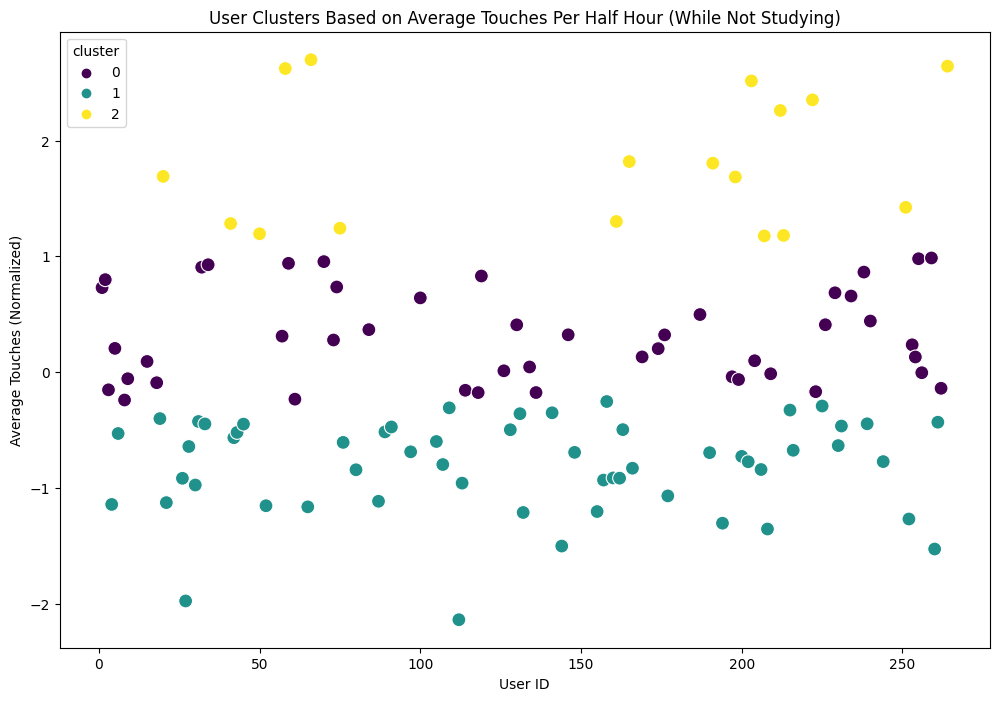

In [19]:
df = merged_df.copy()
# Seleziona solo le colonne necessarie
df = df[['userid', 'timestamp', 'touch_count']]

# Converti la colonna timestamp in formato datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calcola il numero medio di tocchi per mezzora per ciascun utente
average_touches = df.groupby(['userid', df['timestamp']])['touch_count'].mean().reset_index()
average_touches.rename(columns={'touch_count': 'average_touches'}, inplace=True)

# Crea un DataFrame con userid e media dei tocchi
user_avg_df = average_touches.groupby('userid')['average_touches'].mean().reset_index()

# Normalizza i dati per prepararli all'algoritmo di clustering
scaler = StandardScaler()
user_avg_df[['average_touches']] = scaler.fit_transform(user_avg_df[['average_touches']])

# Applica K-Means per creare 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
user_avg_df['cluster'] = kmeans.fit_predict(user_avg_df[['average_touches']])

# Visualizza i cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='userid', y='average_touches', hue='cluster', data=user_avg_df, palette='viridis', s=100)
plt.title('User Clusters Based on Average Touches Per Half Hour (While Not Studying)')
plt.xlabel('User ID')
plt.ylabel('Average Touches (Normalized)')
plt.show()

In [20]:
cluster_stats = user_avg_df.groupby('cluster')['average_touches'].describe()
print(cluster_stats)

         count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0         46.0  0.313251  0.397865 -0.241466 -0.034085  0.256332  0.678045   
1         56.0 -0.809092  0.408726 -2.140026 -1.081674 -0.712455 -0.491627   
2         17.0  1.817622  0.578345  1.176406  1.283791  1.690994  2.352127   

              max  
cluster            
0        0.985905  
1       -0.254438  
2        2.699070  


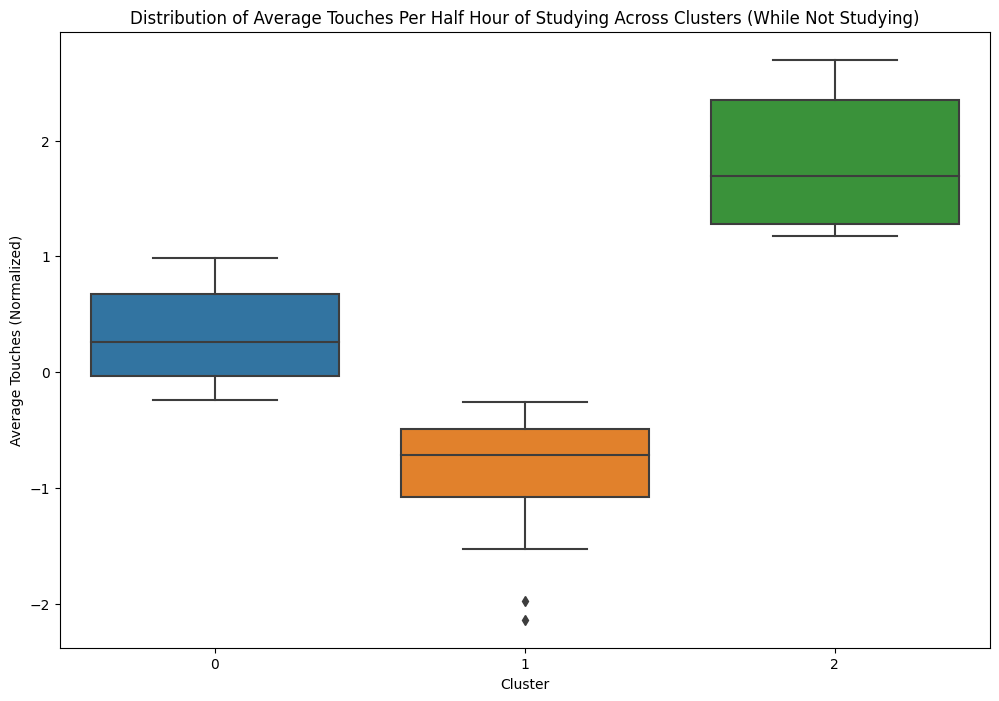

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='average_touches', data=user_avg_df)
plt.title('Distribution of Average Touches Per Half Hour of Studying Across Clusters (While Not Studying)')
plt.xlabel('Cluster')
plt.ylabel('Average Touches (Normalized)')
plt.show()


In [23]:
usage = pd.read_csv('DATA/CLASS_USAGExNOTSTUDY.csv')

In [24]:
usage

,Unnamed: 0,userid,name,start_timestamp,end_timestamp,study
0,0,1,Productivity,2020-11-12 11:17:09.528,2020-11-12 11:17:14.540,False
1,1,1,Productivity,2020-11-12 11:17:19.540,2020-11-12 11:17:19.540,False
2,3,1,Altro,2020-11-12 11:17:38.689,2020-11-12 11:17:43.697,False
3,5,1,Chat,2020-11-12 11:18:04.663,2020-11-12 11:21:00.473,False
4,7,1,Chat,2020-11-12 11:21:55.668,2020-11-12 11:22:30.743,False
...,...,...,...,...,...,...
157506,233130,264,Chat,2020-12-12 00:56:22.481,2020-12-12 00:56:32.483,False
157507,233131,264,Game,2020-12-12 00:56:37.483,2020-12-12 01:41:55.874,False
157508,233133,264,Social,2020-12-12 01:42:05.884,2020-12-12 01:46:41.471,False
157509,233134,264,Social,2020-12-12 01:46:46.479,2020-12-12 01:51:01.660,False


In [22]:
touch

,experimentid,userid,day,timestamp,touch_count
0,wenetItaly,144,20201117,2020-11-17 23:30:00,93
1,wenetItaly,144,20201117,2020-11-17 23:00:00,1
2,wenetItaly,144,20201117,2020-11-17 22:00:00,10
3,wenetItaly,144,20201117,2020-11-17 21:30:00,37
4,wenetItaly,144,20201117,2020-11-17 21:00:00,40
...,...,...,...,...,...
77789,wenetItaly,208,20201124,2020-11-24 10:00:00,33
77790,wenetItaly,208,20201124,2020-11-24 09:30:00,56
77791,wenetItaly,208,20201124,2020-11-24 09:00:00,94
77792,wenetItaly,208,20201124,2020-11-24 08:00:00,61


In [43]:
merged_df['touch_count'].describe()

count    42492.000000
mean       182.793138
std        194.053506
min          1.000000
25%         40.000000
50%        115.000000
75%        261.000000
max       1462.000000
Name: touch_count, dtype: float64

In [53]:
merged_df['touch_count'].describe()

count    9105.000000
mean      151.210104
std       163.771989
min         1.000000
25%        35.000000
50%        96.000000
75%       211.000000
max      1371.000000
Name: touch_count, dtype: float64